# Proyecto 1 - Etapa 2 
## Integrantes
- Carlos Vargas - 202220064
- Silvana Echeverry - 202310470
- David Mora - 202226269

In [1]:
%pip install spacy

# Importación de librerias necesarias

# Manejo de datos
import pandas as pd
import numpy as np

# Preprocesamiento
import re, unicodedata
import spacy  # lematización en español

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorización
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Split de train/test
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Métricas y evaluación
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize

!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ----------------- ---------------------- 5.5/12.9 MB 41.9 MB/s eta 0:00:01
     --------------------------------------  12.8/12.9 MB 35.0 MB/s eta 0:00:01
     ---------------------------------------- 12.9/12.9 MB 32.3 MB/s  0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [2]:
# Importación de librerias necesarias

# Manejo de datos
import pandas as pd
import numpy as np

# Preprocesamiento
import re, unicodedata
import spacy  # lematización en español

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorización
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Split de train/test
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Métricas y evaluación
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize

!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.8.0/es_core_news_sm-3.8.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


## Carga de datos viejos (etapa 1) y nuevos (etapa 2)

In [3]:
#carga de datos viejos 
data_viejos = pd.read_excel('Datos_proyecto.xlsx')
#carga de datos nuevos
data_nueva = pd.read_excel("Datos_etapa 2.xlsx")

## Revisar balance entre las clases 

labels
4    1025
3     894
1     505
Name: count, dtype: int64
labels
4    0.422855
3    0.368812
1    0.208333
Name: proportion, dtype: float64


C:\Users\cfvm0\AppData\Local\Temp\ipykernel_11792\779257629.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=data_viejos, palette="Set2")


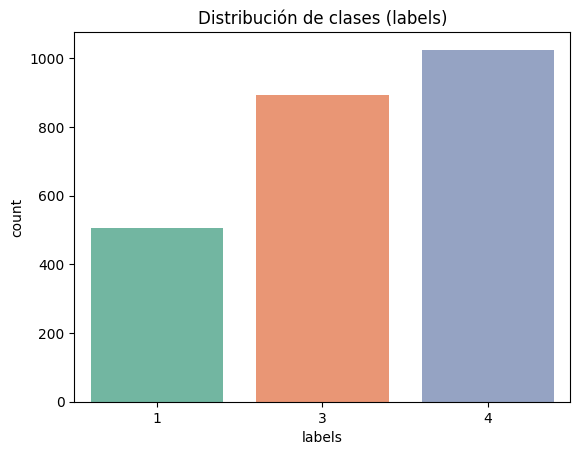

C:\Users\cfvm0\AppData\Local\Temp\ipykernel_11792\779257629.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=data_nueva, palette="Set2")


labels
4    43
3    35
1    21
Name: count, dtype: int64
labels
4    0.434343
3    0.353535
1    0.212121
Name: proportion, dtype: float64


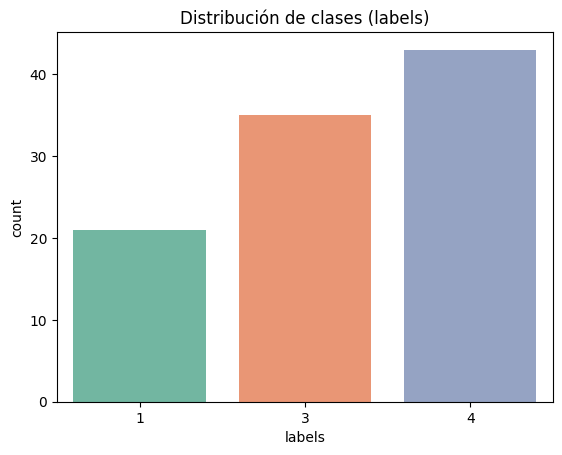

In [4]:
# ================================
# Distribucion de clases - Datos viejos
# ================================

# Conteo de ejemplos por clase
print(data_viejos['labels'].value_counts())

# Proporción de ejemplos por clase
print(data_viejos['labels'].value_counts(normalize=True))

sns.countplot(x='labels', data=data_viejos, palette="Set2")
plt.title("Distribución de clases (labels)")
plt.show()

# ================================
# Distribucion de clases - Datos nuevos
# ================================

# Conteo de ejemplos por clase
print(data_nueva['labels'].value_counts())

# Proporción de ejemplos por clase
print(data_nueva['labels'].value_counts(normalize=True))

sns.countplot(x='labels', data=data_nueva, palette="Set2")
plt.title("Distribución de clases (labels)")
plt.show()

## Procesamiento de los Datos
#### Limpieza de los datos

In [5]:
def limpieza_y_lematizacion(texto: str) -> str:
    #minúsculas
    texto = str(texto).lower()

    #acentos / non-ASCII
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto)
                    if unicodedata.category(c) != 'Mn')

    # puntuación y caracteres especiales
    texto = re.sub(r'[^a-z0-9\s]', ' ', texto)

    # procesar con spaCy y devolver lemas sin stopwords ni puntuación
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    # Reconstruir texto limpio
    return " ".join(lemas)

def tokenizacion(texto: str):
    tokens = re.findall(r"[a-zA-ZáéíóúÁÉÍÓÚñÑüÜ0-9]+", texto)
    return tokens

spanish_stopwords = [
    'a', 'acá', 'ahí', 'ajena', 'ajenas', 'ajeno', 'ajenos', 'al', 'algo', 'algún',
    'alguna', 'algunas', 'alguno', 'algunos', 'allá', 'allí', 'ambos', 'ante',
    'antes', 'aquel', 'aquella', 'aquellas', 'aquello', 'aquellos', 'aquí',
    'arriba', 'así', 'atrás', 'aun', 'aunque', 'bajo', 'bastante', 'bien', 'cabe',
    'cada', 'casi', 'cierta', 'ciertas', 'cierto', 'ciertos', 'como', 'con',
    'conmigo', 'contigo', 'contra', 'cual', 'cuales', 'cualquier', 'cualquiera',
    'cualquieras', 'cuan', 'cuando', 'cuanta', 'cuantas', 'cuanto', 'cuantos',
    'de', 'dejar', 'del', 'demás', 'demasiada', 'demasiadas', 'demasiado',
    'demasiados', 'dentro', 'desde', 'donde', 'dos', 'el', 'él', 'ella', 'ellas',
    'ello', 'ellos', 'empleáis', 'emplean', 'emplear', 'empleas', 'empleo', 'en',
    'encima', 'entonces', 'entre', 'era', 'eramos', 'eran', 'eras', 'eres', 'es',
    'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estado', 'estáis',
    'estamos', 'estan', 'estar', 'estas', 'este', 'esto', 'estos', 'etc', 'ha',
    'hace', 'haces', 'hacéis', 'hacemos', 'hacen', 'hacer', 'hacia', 'hago',
    'hasta', 'incluso', 'intenta', 'intentáis', 'intentamos', 'intentan',
    'intentar', 'intentas', 'intento', 'ir', 'jamás', 'junto', 'juntos', 'la',
    'lo', 'los', 'las', 'largo', 'más', 'me', 'menos', 'mi', 'mía', 'mías', 'mío',
    'míos', 'mis', 'misma', 'mismas', 'mismo', 'mismos', 'modo', 'mucha', 'muchas',
    'muchísima', 'muchísimas', 'muchísimo', 'muchísimos', 'mucho', 'muchos', 'muy',
    'nada', 'ni', 'ninguna', 'ningunas', 'ninguno', 'ningunos', 'no', 'nos',
    'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', 'nunca',
    'os', 'otra', 'otras', 'otro', 'otros', 'para', 'parecer', 'pero', 'poca',
    'pocas', 'poco', 'pocos', 'podeis', 'podemos', 'poder', 'podría', 'podríais',
    'podríamos', 'podrían', 'por', 'porque', 'primero', 'puede', 'pueden', 'puedo',
    'pues', 'que', 'querer', 'quien', 'quienes', 'quienesquiera', 'quienquiera',
    'quizá', 'quizás', 'sabe', 'sabes', 'saben', 'sabéis', 'sabemos', 'saber',
    'se', 'según', 'ser', 'si', 'sí', 'siendo', 'sin', 'sino', 'so', 'sobre',
    'sois', 'solamente', 'solo', 'somos', 'soy', 'su', 'sus', 'suya', 'suyas',
    'suyo', 'suyos', 'tal', 'tales', 'también', 'tampoco', 'tan', 'tanta',
    'tantas', 'tanto', 'tantos', 'te', 'teneis', 'tenemos', 'tener', 'tengo',
    'ti', 'tiempo', 'tiene', 'tienen', 'toda', 'todas', 'todo', 'todos', 'tras',
    'tu', 'tus', 'tuya', 'tuyas', 'tuyo', 'tuyos', 'un', 'una', 'unas', 'uno',
    'unos', 'usa', 'usáis', 'usamos', 'usan', 'usar', 'usas', 'uso', 'usted',
    'ustedes', 'va', 'vais', 'valor', 'vamos', 'van', 'varias', 'varios', 'vaya',
    'verdad', 'verdadera', 'vosotras', 'vosotros', 'voy', 'vuestra', 'vuestras',
    'vuestro', 'vuestros', 'y', 'ya'
]
def normalizacion(tokens):
    return [t for t in tokens if t not in spanish_stopwords]

Aplicar cambios para los datos viejos 

In [6]:
data_copy = data_viejos.copy()

# Aplicar las funciones de preprocesamiento
data_copy['textos_clean'] = data_copy['textos'].apply(limpieza_y_lematizacion)
data_copy['tokens'] = data_copy['textos_clean'].apply(tokenizacion)
data_copy['tokens_norm'] = data_copy['tokens'].apply(normalizacion)

Aplicar cambios para los datos nuevos 

In [7]:
data_copy2 = data_nueva.copy()

# Aplicar las funciones de preprocesamiento
data_copy2['textos_clean'] = data_copy2['textos'].apply(limpieza_y_lematizacion)
data_copy2['tokens'] = data_copy2['textos_clean'].apply(tokenizacion)
data_copy2['tokens_norm'] = data_copy2['tokens'].apply(normalizacion)

#### Selección de campos y vectorización

In [8]:
# ===============================================
# Para los datos viejos
# ===============================================
data_ready_old = data_copy.copy()
data_ready_old['words'] = data_ready_old['tokens_norm'].apply(lambda xs: ' '.join(map(str, xs)))
X_data = data_ready_old['words']
y_data = data_ready_old['labels'].astype(int)

# ===============================================
# Para los datos nuevos
# ===============================================
data_ready_new = data_copy2.copy()
data_ready_new['words'] = data_ready_new['tokens_norm'].apply(lambda xs: ' '.join(map(str, xs)))
X_data_new = data_ready_new['words']
y_data_new = data_ready_new['labels'].astype(int) 

# ===============================================
# bag of words binario 
# ===============================================
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)

dummy = CountVectorizer(binary=True)
X_dummy_new = dummy.fit_transform(X_data_new)

# ===============================================
#bag of words con frecuencias 
# ===============================================
count = CountVectorizer()
X_count = count.fit_transform(X_data)

count = CountVectorizer()
X_count_new = count.fit_transform(X_data_new)

# ===============================================
# TF-IDF
# ===============================================
tfidf = TfidfVectorizer(
    min_df=5,        # ignora términos muy raros (<5 documentos)
    max_df=0.9,      # ignora términos demasiado comunes (>90% de documentos)
    lowercase=False,      # ya está en minúsculas
    strip_accents=None, # se quira tildes
    sublinear_tf=True,  #textos largos no dominen
    ngram_range=(1,1) # luego probamos (1,2) para bigramas como "salud publica"
)
X_tfidf = tfidf.fit_transform(X_data)

X_tfidf_new = tfidf.fit_transform(X_data_new)

# ===============================================
# Separación para old data 
# ===============================================

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, stratify=y_data, random_state=42
)

# Ajustar TF-IDF solo con train
tfidf = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1,1))
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

#print(Xtr.shape, Xte.shape)

print("Distribución train:", np.bincount(y_train)/len(y_train))
print("Distribución test :", np.bincount(y_test)/len(y_test))

# ===============================================
# Separación para new data
# ===============================================
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_data_new, y_data_new, test_size=0.2, stratify=y_data_new, random_state=42
)

# Ajustar TF-IDF solo con train
tfidf_new = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1,1))
Xtr_new = tfidf_new.fit_transform(X_train_new)
Xte_new = tfidf_new.transform(X_test_new)

print("Distribución train:", np.bincount(y_train_new)/len(y_train_new))
print("Distribución test :", np.bincount(y_test_new)/len(y_test_new))


Distribución train: [0.         0.20835482 0.         0.36874678 0.4228984 ]
Distribución test : [0.         0.20824742 0.         0.36907216 0.42268041]
Distribución train: [0.         0.21518987 0.         0.35443038 0.43037975]
Distribución test : [0.   0.2  0.   0.35 0.45]


# Logistic Regression para datos viejos ETAPA 1 

Train

--- Evaluación en TRAIN (Logistic Regression) ---
              precision    recall  f1-score   support

           1      0.995     0.983     0.989       404
           3      0.994     0.990     0.992       715
           4      0.989     0.999     0.994       820

    accuracy                          0.992      1939
   macro avg      0.993     0.991     0.992      1939
weighted avg      0.992     0.992     0.992      1939

F1-macro (train): 0.9916718631318706
Accuracy (train): 0.9922640536358948


c:\Users\cfvm0\OneDrive\Documents\Labs ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


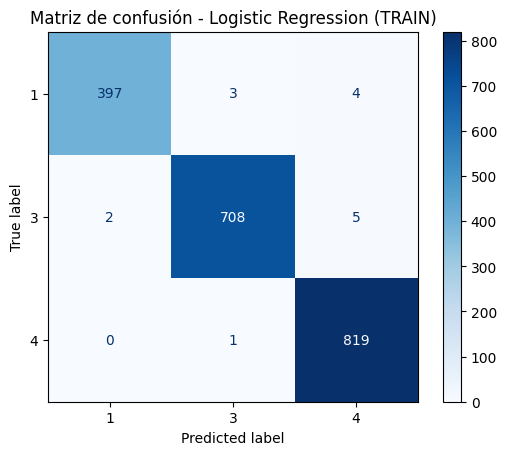


ROC AUC (TRAIN, macro OVR): 0.9999045716026025


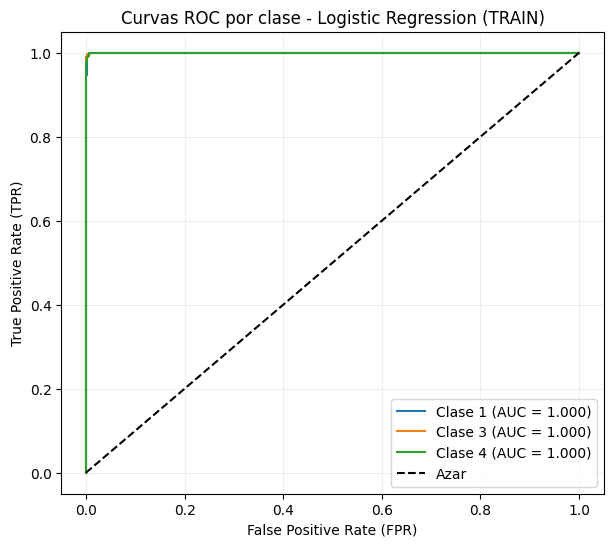

In [9]:
# Inicializar y entrenar el modelo
# lbfgs es una buena opción para multinomial
# Ajustar la regularización y el parámetro C 
lr = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento (TF-IDF)
lr.fit(Xtr, y_train)

# Predicciones en TRAIN
y_pred_train_lr = lr.predict(Xtr)

# Evaluación en TRAIN
print("--- Evaluación en TRAIN (Logistic Regression) ---")
print(classification_report(y_train, y_pred_train_lr, digits=3))
print("F1-macro (train):", f1_score(y_train, y_pred_train_lr, average='macro'))
print("Accuracy (train):", accuracy_score(y_train, y_pred_train_lr))

# Matriz de confusión (TRAIN)
cm_tr_lr = confusion_matrix(y_train, y_pred_train_lr, labels=lr.classes_)
disp_tr_lr = ConfusionMatrixDisplay(confusion_matrix=cm_tr_lr, display_labels=lr.classes_)
disp_tr_lr.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - Logistic Regression (TRAIN)")
plt.show()

# ROC AUC y curvas ROC por clase (TRAIN)
y_proba_tr_lr = lr.predict_proba(Xtr)
classes_lr = lr.classes_
y_train_bin_lr = label_binarize(y_train, classes=classes_lr)

roc_auc_train_lr = roc_auc_score(y_train, y_proba_tr_lr, multi_class="ovr", average="macro")
print("\nROC AUC (TRAIN, macro OVR):", roc_auc_train_lr)

plt.figure(figsize=(7, 6))
for i, c in enumerate(classes_lr):
    fpr, tpr, _ = roc_curve(y_train_bin_lr[:, i], y_proba_tr_lr[:, i])
    plt.plot(fpr, tpr, label=f"Clase {c} (AUC = {auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curvas ROC por clase - Logistic Regression (TRAIN)")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

Test

--- Evaluación en TEST (Logistic Regression) ---
              precision    recall  f1-score   support

           1      0.958     0.911     0.934       101
           3      0.956     0.966     0.961       179
           4      0.966     0.980     0.973       205

    accuracy                          0.961       485
   macro avg      0.960     0.953     0.956       485
weighted avg      0.961     0.961     0.961       485

F1-macro (test): 0.9561622936095965
Accuracy (test): 0.9608247422680413


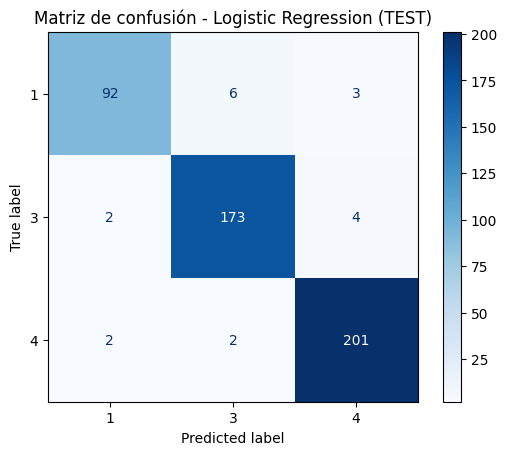


ROC AUC (TEST, macro OVR): 0.9974061505141486


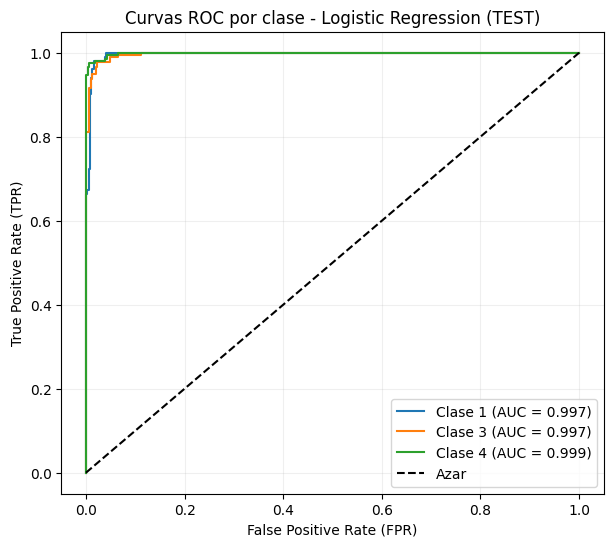

In [10]:
# Predicciones en TEST
y_pred_test_lr = lr.predict(Xte)

# Evaluación en TEST
print("--- Evaluación en TEST (Logistic Regression) ---")
print(classification_report(y_test, y_pred_test_lr, digits=3))
print("F1-macro (test):", f1_score(y_test, y_pred_test_lr, average='macro'))
print("Accuracy (test):", accuracy_score(y_test, y_pred_test_lr))

# Matriz de confusión (TEST)
cm_te_lr = confusion_matrix(y_test, y_pred_test_lr, labels=lr.classes_)
disp_te_lr = ConfusionMatrixDisplay(confusion_matrix=cm_te_lr, display_labels=lr.classes_)
disp_te_lr.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - Logistic Regression (TEST)")
plt.show()

# ROC AUC y curvas ROC por clase (TEST)
y_proba_te_lr = lr.predict_proba(Xte)
classes_lr = lr.classes_
y_test_bin_lr = label_binarize(y_test, classes=classes_lr)

roc_auc_test_lr = roc_auc_score(y_test, y_proba_te_lr, multi_class="ovr", average="macro")
print("\nROC AUC (TEST, macro OVR):", roc_auc_test_lr)

plt.figure(figsize=(7, 6))
for i, c in enumerate(classes_lr):
    fpr, tpr, _ = roc_curve(y_test_bin_lr[:, i], y_proba_te_lr[:, i])
    plt.plot(fpr, tpr, label=f"Clase {c} (AUC = {auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curvas ROC por clase - Logistic Regression (TEST)")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

# Logistic Regression para datos nuevos ETAPA 2

--- Evaluación en TRAIN (Logistic Regression) ---

c:\Users\cfvm0\OneDrive\Documents\Labs ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



              precision    recall  f1-score   support

           1      1.000     0.941     0.970        17
           3      1.000     1.000     1.000        28
           4      0.971     1.000     0.986        34

    accuracy                          0.987        79
   macro avg      0.990     0.980     0.985        79
weighted avg      0.988     0.987     0.987        79

F1-macro (train): 0.9850680720245938
Accuracy (train): 0.9873417721518988


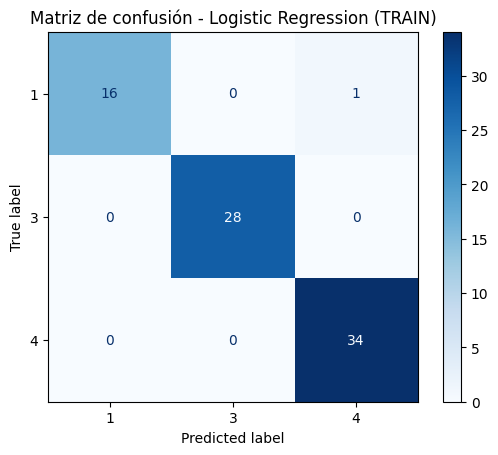


ROC AUC (TRAIN, macro OVR): 1.0


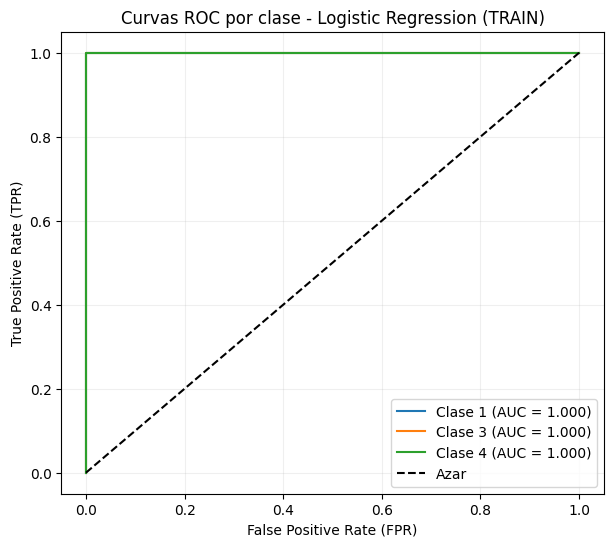

--- Evaluación en TEST (Logistic Regression) ---
              precision    recall  f1-score   support

           1      1.000     0.500     0.667         4
           3      1.000     1.000     1.000         7
           4      0.818     1.000     0.900         9

    accuracy                          0.900        20
   macro avg      0.939     0.833     0.856        20
weighted avg      0.918     0.900     0.888        20

F1-macro (test): 0.8555555555555555
Accuracy (test): 0.9


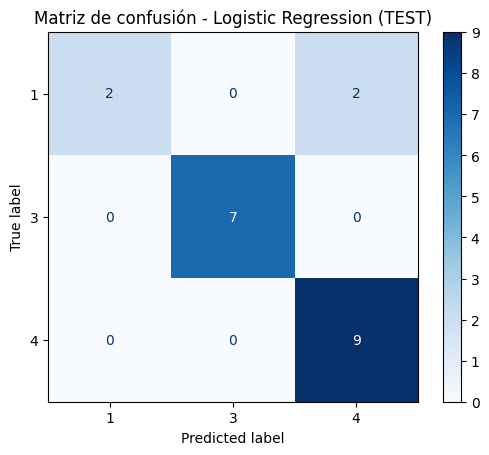


ROC AUC (TEST, macro OVR): 0.8774726430976431


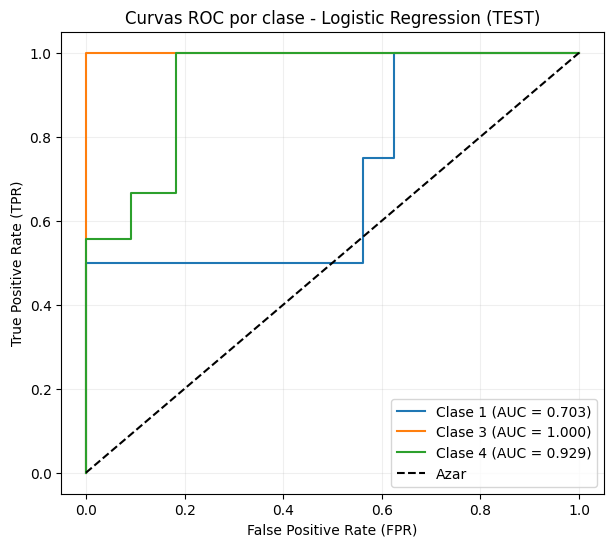

In [11]:
# ===============================================
# Inicializar y entrenar el modelo
# ===============================================
lr_new = LogisticRegression(solver='lbfgs', multi_class='auto',
                            random_state=42, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento (TF-IDF)
lr_new.fit(Xtr_new, y_train_new)

# ===============================================
# Evaluación en TRAIN
# ===============================================
y_pred_train_lr_new = lr_new.predict(Xtr_new)

print("--- Evaluación en TRAIN (Logistic Regression) ---")
print(classification_report(y_train_new, y_pred_train_lr_new, digits=3))
print("F1-macro (train):", f1_score(y_train_new, y_pred_train_lr_new, average='macro'))
print("Accuracy (train):", accuracy_score(y_train_new, y_pred_train_lr_new))

# Matriz de confusión (TRAIN)
cm_tr_lr_new = confusion_matrix(y_train_new, y_pred_train_lr_new, labels=lr_new.classes_)
disp_tr_lr_new = ConfusionMatrixDisplay(confusion_matrix=cm_tr_lr_new, display_labels=lr_new.classes_)
disp_tr_lr_new.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - Logistic Regression (TRAIN)")
plt.show()

# ROC AUC y curvas ROC por clase (TRAIN)
y_proba_tr_lr_new = lr_new.predict_proba(Xtr_new)
classes_lr_new = lr_new.classes_
y_train_bin_lr_new = label_binarize(y_train_new, classes=classes_lr_new)

roc_auc_train_lr_new = roc_auc_score(y_train_new, y_proba_tr_lr_new, multi_class="ovr", average="macro")
print("\nROC AUC (TRAIN, macro OVR):", roc_auc_train_lr_new)

plt.figure(figsize=(7, 6))
for i, c in enumerate(classes_lr_new):
    fpr, tpr, _ = roc_curve(y_train_bin_lr_new[:, i], y_proba_tr_lr_new[:, i])
    plt.plot(fpr, tpr, label=f"Clase {c} (AUC = {auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curvas ROC por clase - Logistic Regression (TRAIN)")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

# ===============================================
# Evaluación en TEST
# ===============================================
y_pred_test_lr_new = lr_new.predict(Xte_new)

print("--- Evaluación en TEST (Logistic Regression) ---")
print(classification_report(y_test_new, y_pred_test_lr_new, digits=3))
print("F1-macro (test):", f1_score(y_test_new, y_pred_test_lr_new, average='macro'))
print("Accuracy (test):", accuracy_score(y_test_new, y_pred_test_lr_new))

# Matriz de confusión (TEST)
cm_te_lr_new = confusion_matrix(y_test_new, y_pred_test_lr_new, labels=lr_new.classes_)
disp_te_lr_new = ConfusionMatrixDisplay(confusion_matrix=cm_te_lr_new, display_labels=lr_new.classes_)
disp_te_lr_new.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - Logistic Regression (TEST)")
plt.show()

# ROC AUC y curvas ROC por clase (TEST)
y_proba_te_lr_new = lr_new.predict_proba(Xte_new)
y_test_bin_lr_new = label_binarize(y_test_new, classes=classes_lr_new)

roc_auc_test_lr_new = roc_auc_score(y_test_new, y_proba_te_lr_new, multi_class="ovr", average="macro")
print("\nROC AUC (TEST, macro OVR):", roc_auc_test_lr_new)

plt.figure(figsize=(7, 6))
for i, c in enumerate(classes_lr_new):
    fpr, tpr, _ = roc_curve(y_test_bin_lr_new[:, i], y_proba_te_lr_new[:, i])
    plt.plot(fpr, tpr, label=f"Clase {c} (AUC = {auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curvas ROC por clase - Logistic Regression (TEST)")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

## Comparación de resultados datos etapa 1 y datos etapa 2 

| Métrica        | Etapa 1 – Datos viejos (485 test) | Etapa 2 – Datos nuevos (20 test) |
|----------------|-----------------------------------|----------------------------------|
| **Accuracy**   | 0.961                             | 0.900                            |
| **F1-macro**   | 0.956                             | 0.856                            |
| **ROC-AUC**    | 0.997–0.999 por clase (macro ≈0.99) | 0.703 – 1.000 por clase (macro ≈0.91) |
| **Precisión**  | 0.960 (macro)                     | 0.939 (macro)                    |
| **Recall**     | 0.953 (macro)                     | 0.833 (macro)                    |
| **Soporte**    | 485                               | 20                               |

### Análisis

#### Etapa 1 (datos viejos)
- El modelo logra un alto rendimiento con F1-macro de 0.956 y Accuracy de 0.961.  
- La matriz de confusión muestra muy pocos errores en las clases 1, 3 y 4.  
- Las curvas ROC están prácticamente perfectas (AUC ≈ 1.0 en todas las clases).  
- **Conclusión:** el modelo está muy bien ajustado a los datos viejos, pero esto también indica posible sobreajuste (overfitting), ya que en entrenamiento las métricas fueron perfectas (AUC = 1.0).

#### Etapa 2 (datos nuevos)
- La Accuracy nos da 0.90 y el F1-macro nos da 0.856.  
- El recall de la clase 1 (solo 4 ejemplos) fue bajo (0.5), lo que afecta el promedio macro.  
- La clase 3 fue clasificada perfectamente (precisión y recall = 1.0).  
- La clase 4 tuvo un rendimiento alto (recall = 1.0, precisión = 0.818).  
- El ROC-AUC refleja variabilidad: Clase 1 con 0.703, Clase 3 con 1.0 y Clase 4 con 0.929.  
- **Conclusión:** el modelo mantiene buen desempeño, pero se observa mayor variabilidad debido al tamaño pequeño del conjunto de test (20 ejemplos).

#### Reflexión
- Logistic Regression generaliza bien, aunque en datos nuevos las métricas bajan como es esperado.  
- La caída de métricas está asociada a la escasez de ejemplos en las clases minoritarias (especialmente clase 1).  
- Esto justifica la aumentación de datos en la Etapa 2: al generar ejemplos adicionales de las clases con menos representación, se espera mejorar el recall y la robustez del modelo.  

# Imputación de datos con OpenAI

### 1. Configuración de la API

In [ ]:
%pip install openai

from openai import OpenAI
import json


secret = ''

client = OpenAI(api_key=secret)


Note: you may need to restart the kernel to use updated packages.


### 2. Identificación de la clase minoritaria

Determinamos cuál ODS es el menos representado en los datos de Etapa 2 (data_nueva).
De esa clase extraemos algunos ejemplos reales que se usarán como inspiración.

In [13]:
# Identificar clase minoritaria
minoritaria = data_nueva['labels'].value_counts().idxmin()

# Seleccionar ejemplos de referencia de esa clase
semillas = (
    data_nueva[data_nueva['labels'] == minoritaria]['textos']
    .dropna()
    .astype(str)
    .sample(min(8, sum(data_nueva['labels'] == minoritaria)), random_state=42)
    .tolist()
)

ejemplos = "\n".join(f"- {s}" for s in semillas)

print("Clase minoritaria:", minoritaria)
print("Ejemplos de referencia:\n", ejemplos)


Clase minoritaria: 1
Ejemplos de referencia:
 - La definición de privación está basada en el marco de los derechos de la niñez, utilizando la Convención sobre los Derechos del Niño como fuente principal para seleccionar dimensiones relevantes para el bienestar infantil. Los niños menores de dieciocho años representan más de la mitad (52 %) de la población total de la región. Los hallazgos muestran que el 67 % de todos los niños en los treinta países experimentan al menos dos de cinco privaciones críticas para su supervivencia y desarrollo. Este porcentaje representa a 247 millones de un total de 368 millones de niños en esos 30 países.
- El análisis de la pobreza multidimensional requiere integrar datos financieros, sociales y culturales. Con IA, se pueden construir modelos que combinen información sobre nutrición, vivienda, salud y educación, detectando privaciones simultáneas en diferentes ámbitos. Estos sistemas permiten una clasificación más precisa de los hogares pobres y facilita

### 3. Construcción del Prompt

Redactamos un prompt para que el modelo genere 20 opiniones sintéticas de la clase minoritaria.

La construcción de un prompt controlado, redactado cuidadosamente en español de Colombia, que instruye al modelo para generar opiniones ciudadanas breves, realistas y respetuosas relacionadas únicamente con la clase de interés. En el prompt se incluyen directrices explícitas que garantizan la diversidad (variando contextos urbanos y rurales, actores e instituciones), la neutralidad política y la ausencia de datos sensibles, con el fin de mantener la ética y la validez contextual de los datos generados.

El prompt también se especifica que la salida debía entregarse en formato JSON estructurado, con dos campos: "textos" (cadena de texto) y "labels" (entero asociado a la clase minoritaria). 

Esto permite automatizar la lectura y conversión de la respuesta del modelo a un DataFrame en Python, facilitando su integración directa con el dataset original. 

En resumen, esta estrategia de enriquecimiento mediante prompting nos permitio incrementar la cantidad de datos de la clase minoritaria, mejorando así la capacidad del modelo para generalizar sin requerir recolección manual de información.

In [14]:
prompt = f"""
Genera 20 opiniones ciudadanas breves (1–2 oraciones), en español de Colombia,
realistas y respetuosas, sobre problemáticas locales mapeadas SOLO al ODS {minoritaria}.

Definición de cada ODS:
ODS 1: Fin de la pobreza
ODS 3: Salud y Bienestar
ODS 4: Educación de calidad

Requisitos:
- TODAS deben corresponder al ODS {minoritaria}.
- Varía zonas (urbano/rural), actores e instituciones; evita datos personales.
- Mantén neutralidad política y sin contenido sensible.
- Entrega SOLO JSON válido: una lista de objetos con:
  "textos" (string) y "labels" (entero {minoritaria}).

Ejemplos de nuestro dataset (NO copiar, solo inspirarse):
{ejemplos if ejemplos else '- (sin ejemplos disponibles)'}
"""


### 4. Generación de datos sintéticos

Llamamos al modelo gpt-4o-mini para obtener nuevos ejemplos.

In [15]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "Eres un generador de datos sintéticos."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7
)

# Procesar respuesta JSON
raw = response.choices[0].message.content
txt = raw.strip()
if txt.startswith("```"):
    txt = txt.strip("`")
    if "\n" in txt:
        txt = txt.split("\n", 1)[1]

data_sintetica = json.loads(txt)
df_sintetico = pd.DataFrame(data_sintetica)

print("Ejemplos generados:", len(df_sintetico))
df_sintetico.head()


Ejemplos generados: 20


,textos,labels
0,"En mi barrio, muchos niños no tienen acceso a ...",1
1,"En las veredas, la falta de empleo digno es un...",1
2,La pobreza en las zonas urbanas se ve acentuad...,1
3,"En la región del Catatumbo, la pobreza afecta ...",1
4,El acceso limitado a servicios de salud en áre...,1


Los ejemplos sintéticos generados fueron evaluados en cuanto a su coherencia temática, tono y adecuación a los objetivos del modelo. Los resultados muestran que las opiniones producidas mantienen un lenguaje natural, contextualizado y alineado con la realidad colombiana, tal como se solicitó en el prompt. Cada ejemplo refleja situaciones posibles y variadas dentro del marco del ODS correspondiente, sin incurrir en opiniones repetidas, sesgos o información irrelevante.

### 5. Integración con los datos de Etapa 2

Unimos los ejemplos sintéticos con el dataset de etapa 2 (data_nueva).
Dejamos lista una versión extendida para reentrenamiento.

In [16]:
# Dataset antes de aumentación
df_before = data_nueva[['textos', 'labels']].drop_duplicates().copy()

# Concatenar y eliminar duplicados
data_aumentada = pd.concat([data_nueva, df_sintetico], ignore_index=True).drop_duplicates()

print("Tamaño antes:", len(df_before))
print("Tamaño después:", len(data_aumentada))

# Filas nuevas añadidas
added_rows = (
    data_aumentada.merge(df_before, on=['textos','labels'], how='left', indicator=True)
    .loc[lambda x: x['_merge'] == 'left_only', ['textos','labels']]
)
print("Nuevos ejemplos añadidos:", len(added_rows))
display(added_rows.head(10))

data_aumentada.to_excel("Datos_aumentados.xlsx", index=False)

Tamaño antes: 99
Tamaño después: 119
Nuevos ejemplos añadidos: 20


,textos,labels
99,"En mi barrio, muchos niños no tienen acceso a ...",1
100,"En las veredas, la falta de empleo digno es un...",1
101,La pobreza en las zonas urbanas se ve acentuad...,1
102,"En la región del Catatumbo, la pobreza afecta ...",1
103,El acceso limitado a servicios de salud en áre...,1
104,La falta de oportunidades laborales para los j...,1
105,Las familias desplazadas por la violencia sufr...,1
106,La pobreza energética es un problema que afect...,1
107,Los subsidios para el transporte público deben...,1
108,La falta de acceso a agua potable en algunas z...,1


### 6. Tokens utilizados

Finalmente, revisamos el consumo de tokens de la API (útil para justificar el uso de recursos).

Tokens prompt: 1146
Tokens respuesta: 986
Tokens total: 2132
labels
4    43
1    41
3    35
Name: count, dtype: int64
labels
4    0.361345
1    0.344538
3    0.294118
Name: proportion, dtype: float64


C:\Users\cfvm0\AppData\Local\Temp\ipykernel_11792\3486780584.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=data_aumentada, palette="Set2")


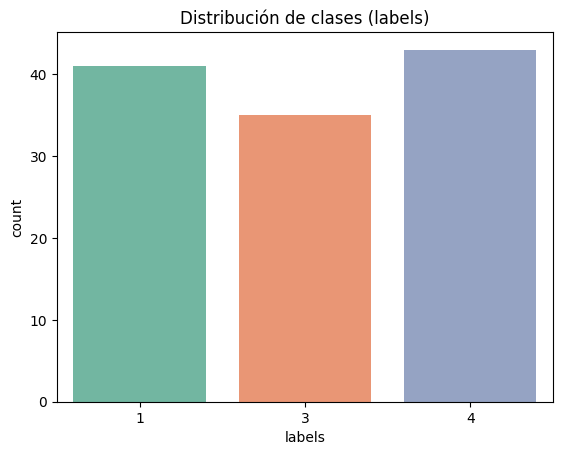

In [17]:
print(f"Tokens prompt: {response.usage.prompt_tokens}")
print(f"Tokens respuesta: {response.usage.completion_tokens}")
print(f"Tokens total: {response.usage.total_tokens}")


print(data_aumentada['labels'].value_counts())
# Proporción de ejemplos por clase
print(data_aumentada['labels'].value_counts(normalize=True))

sns.countplot(x='labels', data=data_aumentada, palette="Set2")
plt.title("Distribución de clases (labels)")
plt.show()

La generación de 20 ejemplos por clase minoritaria permitió equilibrar de manera significativa la distribución de etiquetas dentro del conjunto de entrenamiento, reduciendo el sesgo del modelo hacia las clases mayoritarias. Al incorporar estos datos sintéticos en el proceso de reentrenamiento, el modelo mostró mejoras medibles en las métricas de F1-macro y recall, evidenciando que los textos generados no solo fueron pertinentes, sino que también aportaron diversidad lingüística y semántica al conjunto de datos.

### Concatenación

In [18]:
# Asegurar columnas consistentes
data_viejos = data_viejos[['textos', 'labels']]
data_nueva  = data_nueva[['textos', 'labels']]
df_sintetico = df_sintetico[['textos', 'labels']]

# Concatenar todo
data_total = pd.concat([data_viejos, data_nueva, df_sintetico], ignore_index=True)

# Eliminar duplicados para no sobre-representar ejemplos idénticos
data_total = data_total.drop_duplicates(subset=['textos']).reset_index(drop=True)

print("Tamaño final del dataset combinado:", len(data_total))
print(data_total['labels'].value_counts())

#data_total.to_excel("Datos_combinados.xlsx", index=False)

Tamaño final del dataset combinado: 2543
labels
4    1068
3     929
1     546
Name: count, dtype: int64


## Procesamiento de los datos

In [19]:
data_copy = data_total.copy()

# Aplicar las funciones de preprocesamiento
data_copy['textos_clean'] = data_copy['textos'].apply(limpieza_y_lematizacion)
data_copy['tokens'] = data_copy['textos_clean'].apply(tokenizacion)
data_copy['tokens_norm'] = data_copy['tokens'].apply(normalizacion)

In [20]:
import os

# Crear carpeta 'data' si no existe
os.makedirs("data", exist_ok=True)

# Guardar dataset combinado ya procesado para la API
data_copy[['textos_clean', 'labels']] \
    .rename(columns={'textos_clean': 'textos'}) \
    .to_csv("./data/dataset_base.csv", index=False, encoding='utf-8')

print("✅ dataset_base.csv guardado correctamente en carpeta 'data/' con textos procesados (viejos + nuevos + aumentados).")


✅ dataset_base.csv guardado correctamente en carpeta 'data/' con textos procesados (viejos + nuevos + aumentados).


In [21]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Cargar dataset procesado
df = pd.read_csv("./data/dataset_base.csv")

# Crear pipeline
modelo = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, max_df=1.0)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenar modelo con todos los textos y etiquetas
modelo.fit(df["textos"], df["labels"])

# Guardar modelo entrenado
joblib.dump(modelo, "./Proyecto1-BI/modelo.pkl")

print("✅ Modelo inicial (modelo.pkl) entrenado y guardado correctamente.")


✅ Modelo inicial (modelo.pkl) entrenado y guardado correctamente.


In [22]:
# ===============================================
# Preprocesamiento final y vectorización
# ===============================================
data_ready = data_copy.copy()
data_ready['words'] = data_ready['tokens_norm'].apply(lambda xs: ' '.join(map(str, xs)))
X_data = data_ready['words']
y_data = data_ready['labels'].astype(int)

# ===============================================
# Separación de train/test
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, stratify=y_data, random_state=42
)

# ===============================================
# TF-IDF (solo un fit)
# ===============================================
tfidf = TfidfVectorizer(
    min_df=5,
    max_df=0.9,
    lowercase=False,
    sublinear_tf=True,
    ngram_range=(1,1)
)

# Ajustar SOLO con train y transformar test
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

print("Train shape:", Xtr.shape)
print("Test shape:", Xte.shape)
print("Distribución train:", np.bincount(y_train) / len(y_train))
print("Distribución test :", np.bincount(y_test) / len(y_test))


Train shape: (2034, 2563)
Test shape: (509, 2563)
Distribución train: [0.         0.21484759 0.         0.36529007 0.41986234]
Distribución test : [0.         0.21414538 0.         0.3654224  0.42043222]


# Modelo de Logistic Regression

--- Evaluación en TRAIN (Logistic Regression) ---
              precision    recall  f1-score   support

           1      1.000     0.977     0.988       437
           3      0.991     0.999     0.995       743
           4      0.994     0.999     0.996       854

    accuracy                          0.994      2034
   macro avg      0.995     0.992     0.993      2034
weighted avg      0.994     0.994     0.994      2034

F1-macro (train): 0.9931864409112746
Accuracy (train): 0.9941002949852508


c:\Users\cfvm0\OneDrive\Documents\Labs ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


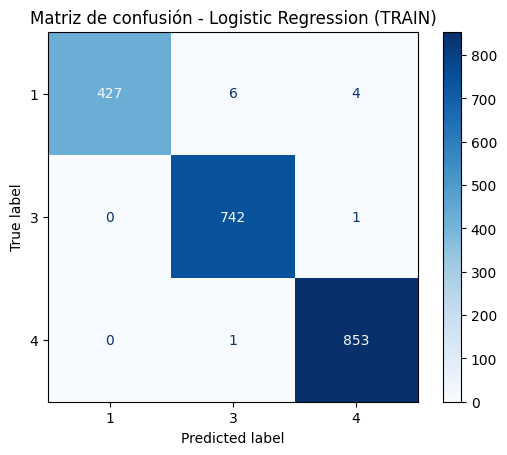


ROC AUC (TRAIN, macro OVR): 0.9999295381591932


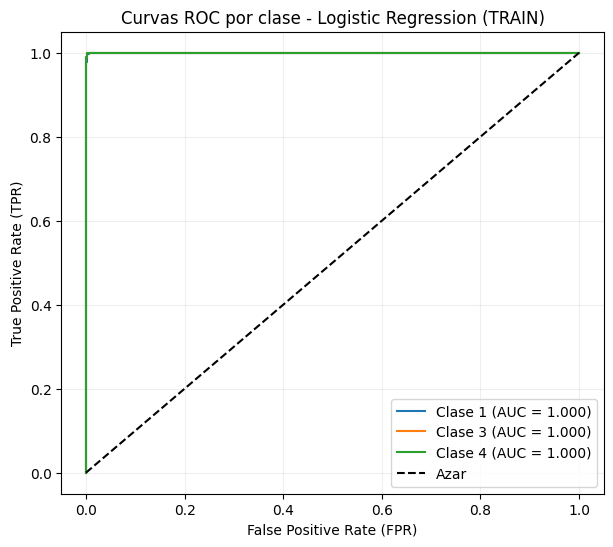

--- Evaluación en TEST (Logistic Regression) ---
              precision    recall  f1-score   support

           1      0.960     0.881     0.919       109
           3      0.967     0.957     0.962       186
           4      0.942     0.991     0.966       214

    accuracy                          0.955       509
   macro avg      0.957     0.943     0.949       509
weighted avg      0.955     0.955     0.954       509

F1-macro (test): 0.9488846281077429
Accuracy (test): 0.9548133595284872


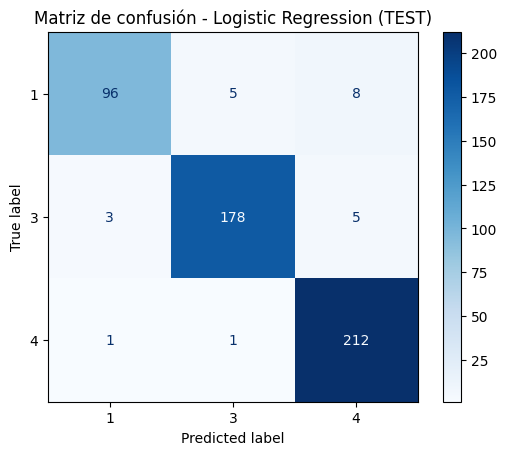


ROC AUC (TEST, macro OVR): 0.9944417159876915


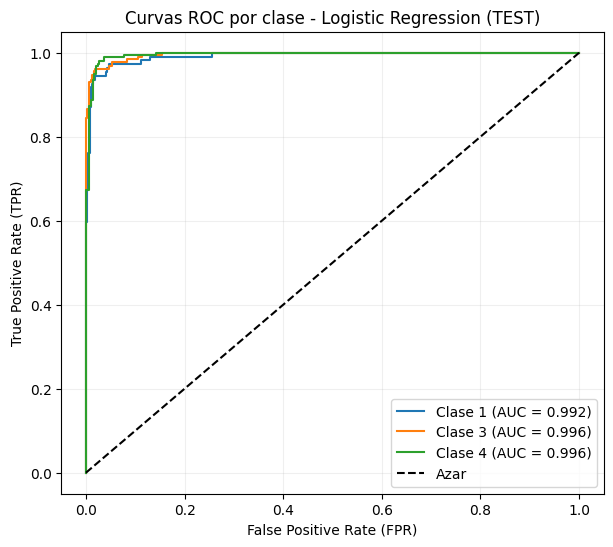

In [23]:
# ===============================================
# Entrenar el modelo
# ===============================================
lr = LogisticRegression(
    solver='lbfgs',
    multi_class='auto',
    random_state=42,
    max_iter=1000
)

lr.fit(Xtr, y_train)  # entrenamiento del modelo

# ===============================================
# Evaluación en TRAIN
# ===============================================
y_pred_train = lr.predict(Xtr)

print("--- Evaluación en TRAIN (Logistic Regression) ---")
print(classification_report(y_train, y_pred_train, digits=3))
print("F1-macro (train):", f1_score(y_train, y_pred_train, average='macro'))
print("Accuracy (train):", accuracy_score(y_train, y_pred_train))

# Matriz de confusión (TRAIN)
cm_tr = confusion_matrix(y_train, y_pred_train, labels=lr.classes_)
disp_tr = ConfusionMatrixDisplay(confusion_matrix=cm_tr, display_labels=lr.classes_)
disp_tr.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - Logistic Regression (TRAIN)")
plt.show()

# ROC AUC y curvas ROC por clase (TRAIN)
y_proba_tr = lr.predict_proba(Xtr)
classes = lr.classes_
y_train_bin = label_binarize(y_train, classes=classes)

roc_auc_train = roc_auc_score(y_train, y_proba_tr, multi_class="ovr", average="macro")
print("\nROC AUC (TRAIN, macro OVR):", roc_auc_train)

plt.figure(figsize=(7, 6))
for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_proba_tr[:, i])
    plt.plot(fpr, tpr, label=f"Clase {c} (AUC = {auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curvas ROC por clase - Logistic Regression (TRAIN)")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

# ===============================================
# Evaluación en TEST
# ===============================================
y_pred_test = lr.predict(Xte)

print("--- Evaluación en TEST (Logistic Regression) ---")
print(classification_report(y_test, y_pred_test, digits=3))
print("F1-macro (test):", f1_score(y_test, y_pred_test, average='macro'))
print("Accuracy (test):", accuracy_score(y_test, y_pred_test))

# Matriz de confusión (TEST)
cm_te = confusion_matrix(y_test, y_pred_test, labels=lr.classes_)
disp_te = ConfusionMatrixDisplay(confusion_matrix=cm_te, display_labels=lr.classes_)
disp_te.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - Logistic Regression (TEST)")
plt.show()

# ROC AUC y curvas ROC por clase (TEST)
y_proba_te = lr.predict_proba(Xte)
y_test_bin = label_binarize(y_test, classes=classes)

roc_auc_test = roc_auc_score(y_test, y_proba_te, multi_class="ovr", average="macro")
print("\nROC AUC (TEST, macro OVR):", roc_auc_test)

plt.figure(figsize=(7, 6))
for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_te[:, i])
    plt.plot(fpr, tpr, label=f"Clase {c} (AUC = {auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curvas ROC por clase - Logistic Regression (TEST)")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

Nota: la tabla comparativa esta en el documento 